In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import BaggingClassifier

In [4]:
#Here I want to test some regressors

import numpy as np
import h5py
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

In [6]:
#I'm going to start by making fake data sets and see what's going on

a = np.zeros(1000)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
f_halo = h5py.File('../m12i_res_7100_cdm/halo_600.hdf5')

pos_halo = f_halo['position'][:]
mass_halo = f_halo['mass'][:]
radius_halo = f_halo['radius'][:]
vel_halo = f_halo['velocity'][:]

#identify the host                                                                                                   \
                                                                                                                      
host_id = np.argmax(mass_halo)
host_mass = mass_halo[host_id]
host_pos = pos_halo[host_id]
host_vel = vel_halo[host_id]

f = h5py.File('DM_data_w_stars_training.hdf5')

coords = f['PartType1']['Coordinates'][:]
vel = f['PartType1']['Velocities'][:]
mass_ratio = f['PartType1']['Mass_Ratio'][:]

#1) attempt to save memory by reducing number of points                                                               
#   remove everything outside 400 kpc (these shouldn't)                                                               
#   factor in anyways                                                                                                 

#I think I need to merge coords and vel into a                                                                        
#2X6 array                                                                                                            

#Now this matrix is so large we run into memory errors                                                                
#                                                                                                                     
#A few potential solutions:                                                                                           
# 1) reduce the number of input points (limit to dm part within 400 kpc?) [NOPE]                                      
# 2) change algorithm (some might require less memory or some option)                                                 
#    may reduce memory                                                                                                
#    - Try using GaussianProccessRegressor module [X]                                                                 
#    - Try "bagging"                                                                                                  
# 3) run on a processor with more memory or figure out how to parallelize                                             

phase_space_coords =  np.concatenate((coords-host_pos,vel-host_vel),axis=1)

X_train, X_test, y_train, y_test = train_test_split(phase_space_coords,mass_ratio,
                                                    test_size=0.5,random_state=102)
                                                                    

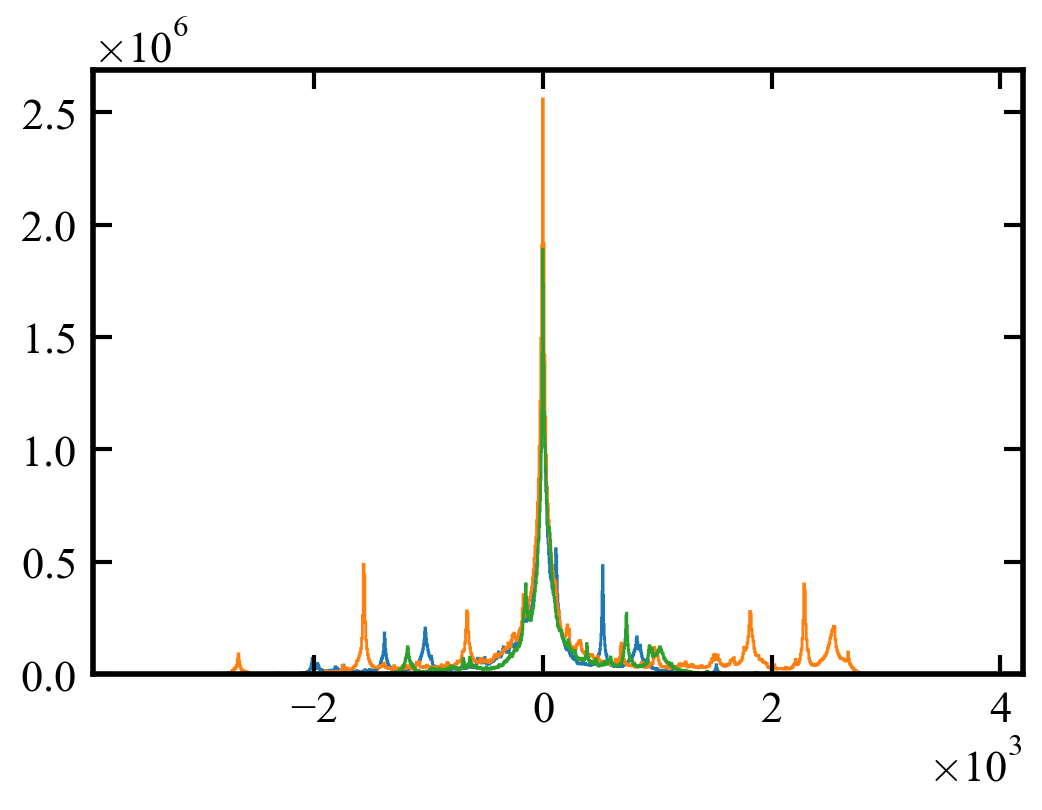

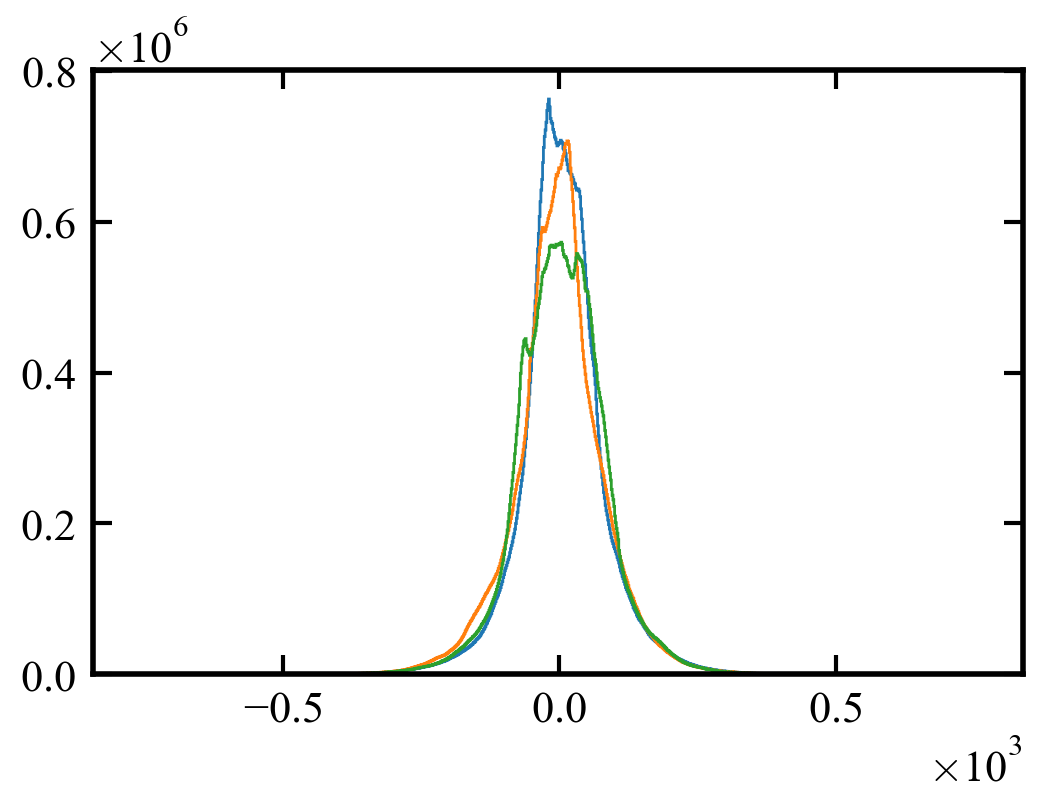

In [10]:
plt.hist(phase_space_coords[:,0],bins=1000,color='C0',histtype='step')
plt.hist(phase_space_coords[:,1],bins=1000,color='C1',histtype='step')
plt.hist(phase_space_coords[:,2],bins=1000,color='C2',histtype='step')
plt.show()

plt.hist(phase_space_coords[:,3],bins=1000,color='C0',histtype='step')
plt.hist(phase_space_coords[:,4],bins=1000,color='C1',histtype='step')
plt.hist(phase_space_coords[:,5],bins=1000,color='C2',histtype='step')
plt.show()

[[-5.45331772e-02  1.44529959e-01  9.80624866e-01  1.32219593e+00
  -6.67541472e-01  8.06873061e-01]
 [-5.81131683e-01 -1.61840260e+00 -3.84484803e-01 -1.60187864e+00
   2.34487447e-01 -1.18943470e+00]
 [-1.47938384e+00  2.14648328e+00  5.69128697e-01 -1.23517332e+00
  -6.86288998e-02  1.06386028e+00]
 ...
 [ 1.08746358e+00 -1.22999221e+00  9.19135199e-01  6.69435007e-01
  -8.94114000e-01  2.55535813e-02]
 [-7.20716527e-01  4.37271216e-01  1.32787506e-01 -3.55931494e-01
  -1.75134780e+00  1.42453100e+00]
 [-3.82352232e-01  9.27373194e-01 -5.33525556e-01  2.83657126e-01
  -1.50627153e-03  9.04704790e-01]]


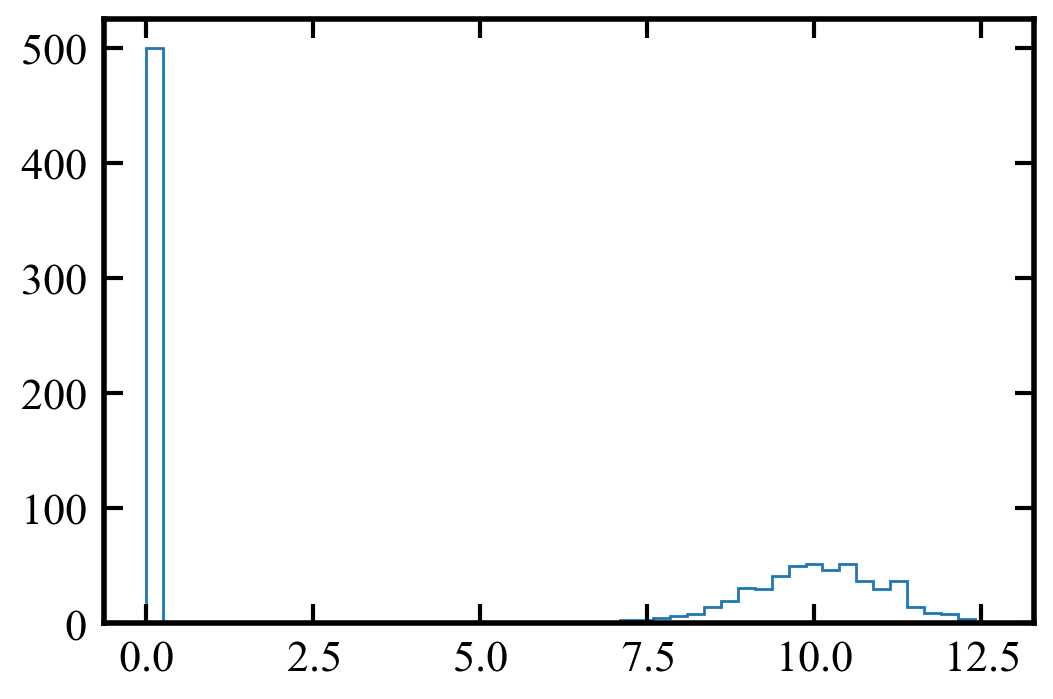

In [58]:
#okay lets generate fake phasespace data

#first I want lets say 1000 mass fractions half is all zeros
#

a = np.zeros(500)
a_prime = np.random.normal(10.0,1.0,500)

x,y,z = np.random.normal(0.0,1.0,1000), np.random.normal(0.0,1.0,1000), np.random.normal(0.0,1.0,1000)
v_x,v_y,v_z = np.random.normal(0.0,1.0,1000), np.random.normal(0.0,1.0,1000), np.random.normal(0.0,1.0,1000)

mass_fraction_fake = np.append(a,a_prime)

#phase_space_coords = np.concatenate((x,y,z,v_x,v_y,v_z),axis=1)
phase_space_coords = np.hstack((x[np.newaxis].T,y[np.newaxis].T,z[np.newaxis].T
                                ,v_x[np.newaxis].T,v_y[np.newaxis].T,v_z[np.newaxis].T))

print phase_space_coords

plt.hist(mass_fraction_fake,50,histtype='step')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(phase_space_coords,mass_fraction_fake,
                                                    test_size=0.5,random_state=102)



In [60]:
def build_model():
    model = keras.Sequential([layers.Dense(64, activation='relu', 
                            input_shape=[len(phase_space_coords[0])]),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1)
                             ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
    
    return model

print 'I guess we build this thing'

model = build_model()

I guess we build this thing


In [28]:
print X_train.shape, y_train.shape
print len(X_train), len(y_train)

(500,) (500,)
500 500


In [65]:
EPOCHS = 100000

history = model.fit(X_train, y_train, epochs=EPOCHS, verbose=0)

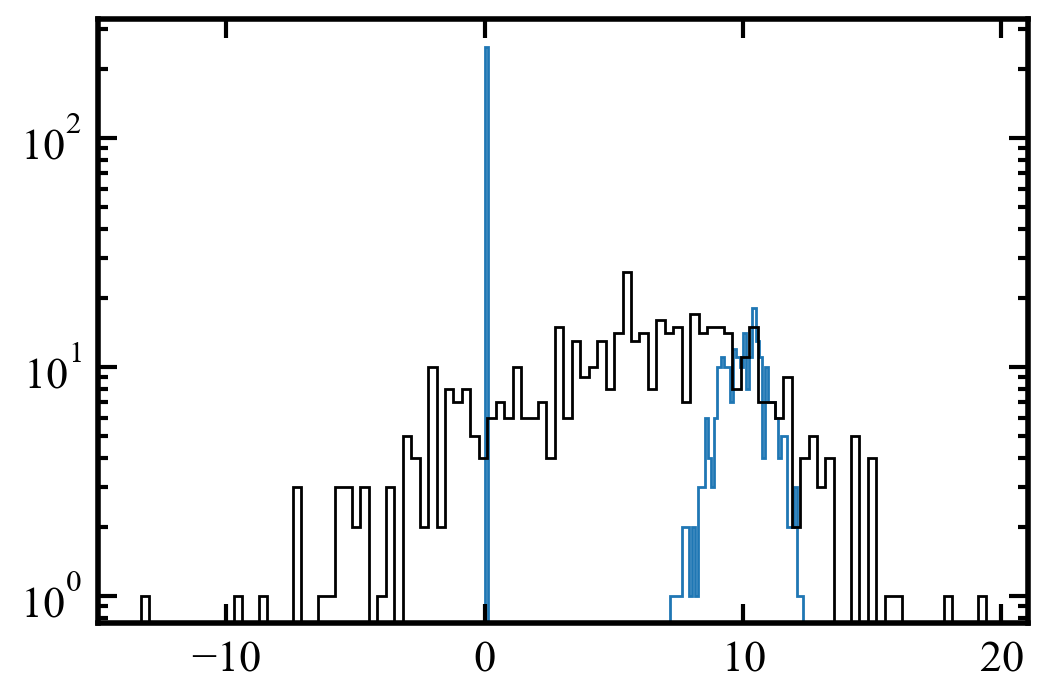

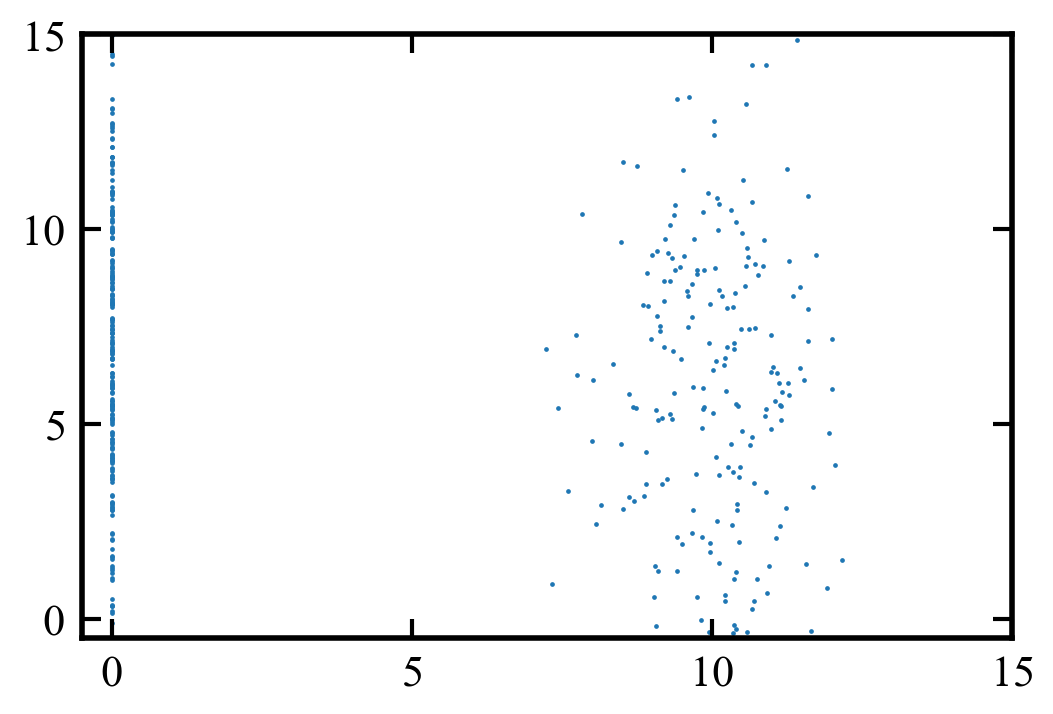

5.84548 3.6209403598852186


In [66]:
mass_ratio_tf = model.predict(X_test)

norm_val=False

plt.hist(y_test,bins=100,histtype='step',color='C0',normed=norm_val)
#plt.hist(mass_ratio_Lasso,bins=1000,histtype='step',color='C1',normed=norm_val)
#plt.hist(mass_ratio_Ridge,bins=hist_bins,histtype='step',color='C2',normed=norm_val)
plt.hist(mass_ratio_tf,bins=100,histtype='step',color='k',normed=norm_val)
#plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(y_test,mass_ratio_tf,s=0.5)
#plt.plot([0.001,5.0],[0.001,5.0])
plt.xlim([-0.5,15.0])
plt.ylim([-0.5,15.0])
#plt.xscale('log')
#plt.yscale('log')
plt.show()

print np.median(mass_ratio_tf), np.median(y_test)


[[-0.95159222 -0.69095824 -1.72011441 -0.2568561  -0.03847387 -0.3117703 ]
 [ 0.89746701  1.00051667 -0.8052848  -0.22532069  0.70064487 -1.41973392]
 [ 0.78039508 -0.32202349  0.81201975  0.927052    0.59794236 -0.2580213 ]
 ...
 [-0.21024615  1.5937776  -0.49408709  0.07615928 -0.39339985 -0.26023893]
 [ 0.47417147  0.14594405 -0.78905885  0.84128378 -1.06222115 -0.2549853 ]
 [ 0.13275814 -0.70199415  2.10327477  0.08442087  1.21033025  0.36262085]]


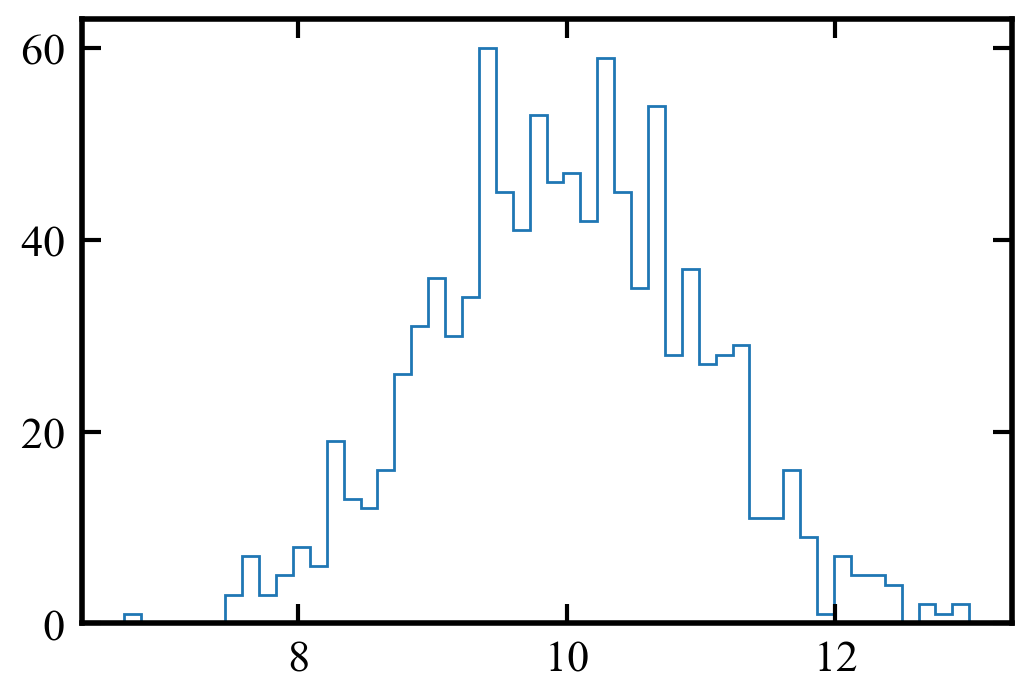

In [67]:
#It seems to not know what to do with the fact that half the data is zero,
#So maybe I need to run a classifier to run zeros and non-zeros and then 
#run a regressor on the non-zeros to get the value
#
#To test this I want to see if we can just get the regular values

mass_fraction_fake = np.random.normal(10.0,1.0,1000)

x,y,z = np.random.normal(0.0,1.0,1000), np.random.normal(0.0,1.0,1000), np.random.normal(0.0,1.0,1000)
v_x,v_y,v_z = np.random.normal(0.0,1.0,1000), np.random.normal(0.0,1.0,1000), np.random.normal(0.0,1.0,1000)

#phase_space_coords = np.concatenate((x,y,z,v_x,v_y,v_z),axis=1)
phase_space_coords = np.hstack((x[np.newaxis].T,y[np.newaxis].T,z[np.newaxis].T
                                ,v_x[np.newaxis].T,v_y[np.newaxis].T,v_z[np.newaxis].T))

print phase_space_coords

plt.hist(mass_fraction_fake,50,histtype='step')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(phase_space_coords,mass_fraction_fake,
                                                    test_size=0.5,random_state=102)

In [68]:
def build_model():
    model = keras.Sequential([layers.Dense(64, activation='relu', 
                            input_shape=[len(phase_space_coords[0])]),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1)
                             ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
    
    return model

print 'I guess we build this thing'

model = build_model()

I guess we build this thing


In [69]:
EPOCHS = 1000

history = model.fit(X_train, y_train, epochs=EPOCHS, verbose=0)

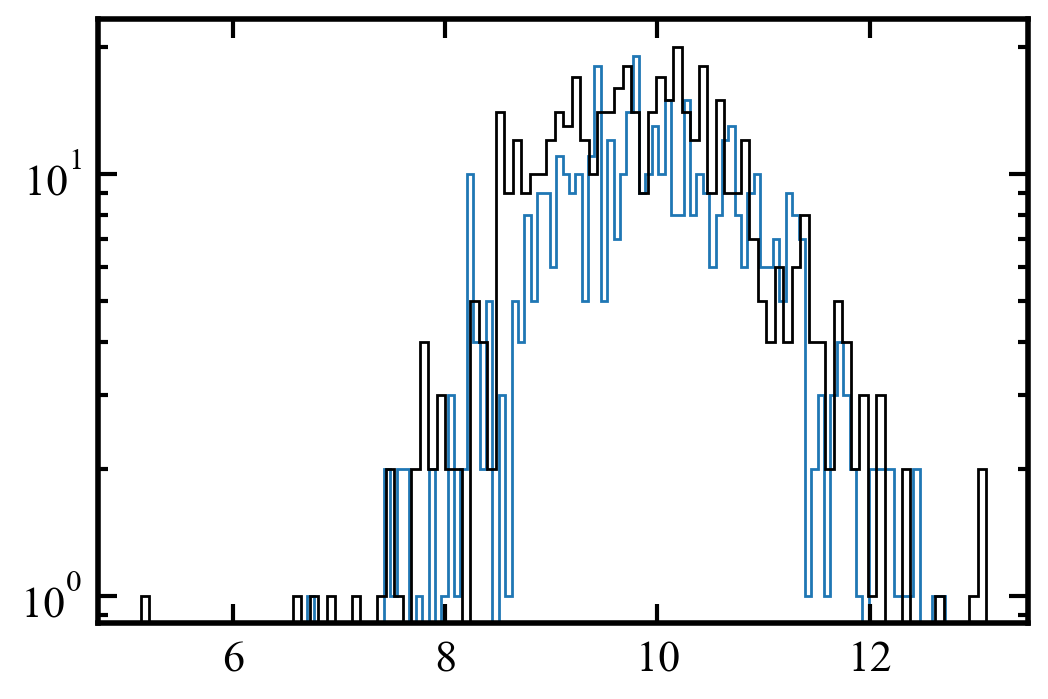

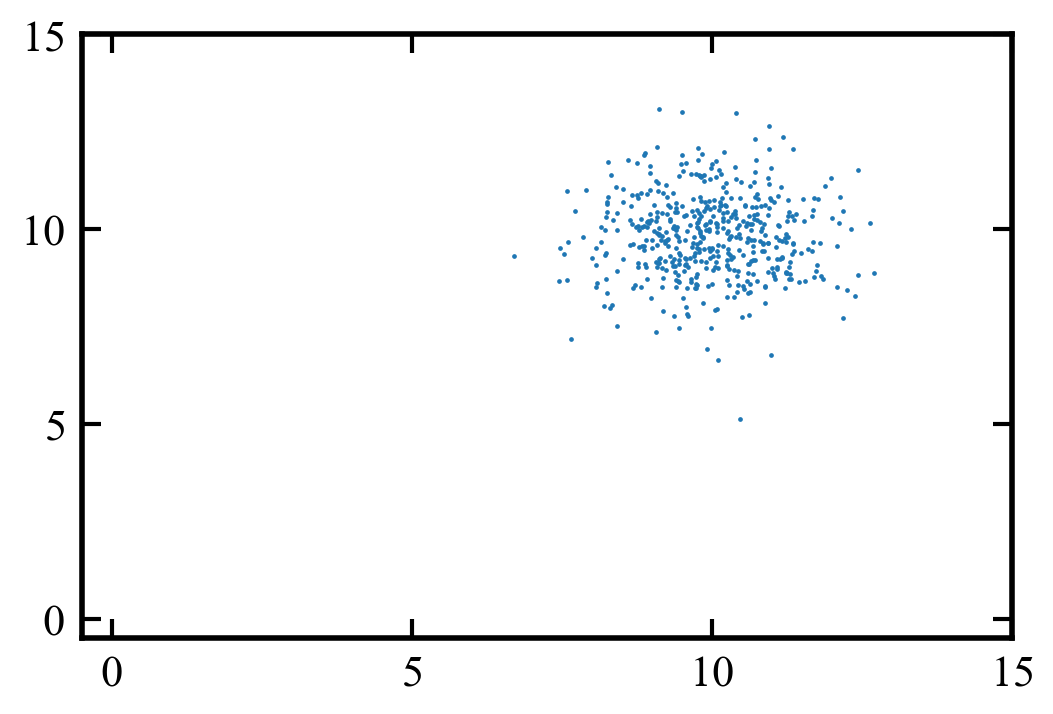

9.805447 9.954146790412718


In [70]:
mass_ratio_tf = model.predict(X_test)

norm_val=False

plt.hist(y_test,bins=100,histtype='step',color='C0',normed=norm_val)
#plt.hist(mass_ratio_Lasso,bins=1000,histtype='step',color='C1',normed=norm_val)
#plt.hist(mass_ratio_Ridge,bins=hist_bins,histtype='step',color='C2',normed=norm_val)
plt.hist(mass_ratio_tf,bins=100,histtype='step',color='k',normed=norm_val)
#plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(y_test,mass_ratio_tf,s=0.5)
#plt.plot([0.001,5.0],[0.001,5.0])
plt.xlim([-0.5,15.0])
plt.ylim([-0.5,15.0])
#plt.xscale('log')
#plt.yscale('log')
plt.show()

print np.median(mass_ratio_tf), np.median(y_test)

0.0 7.620299327474465
0.004524599173063562
352572
-0.0012960085070535012 0.010456659652044172
0.004539546102783891


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


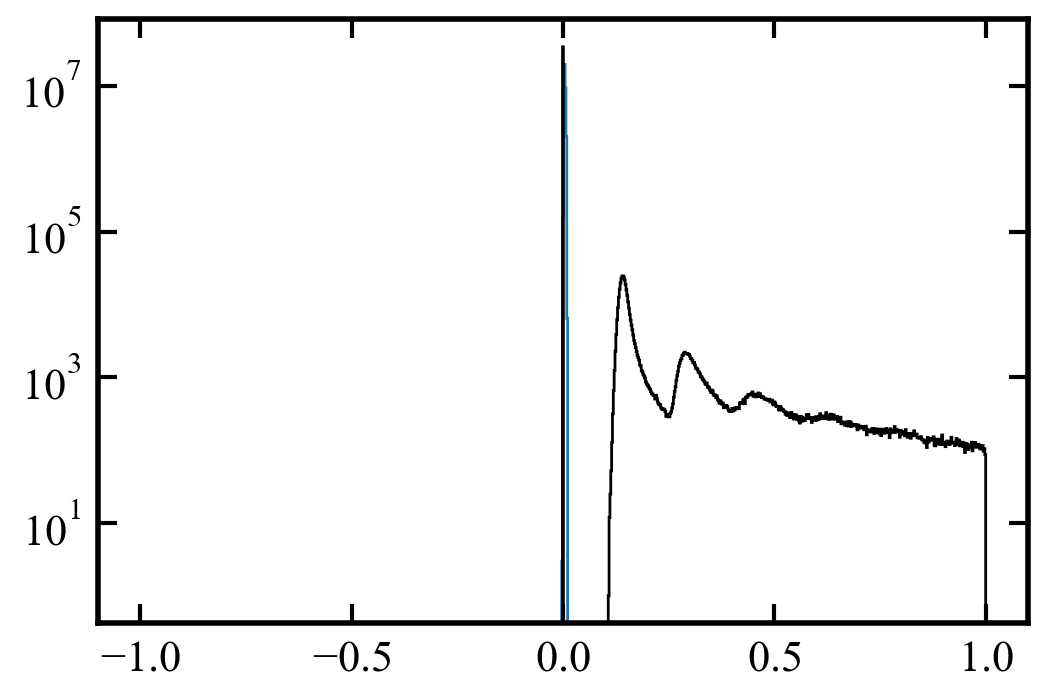

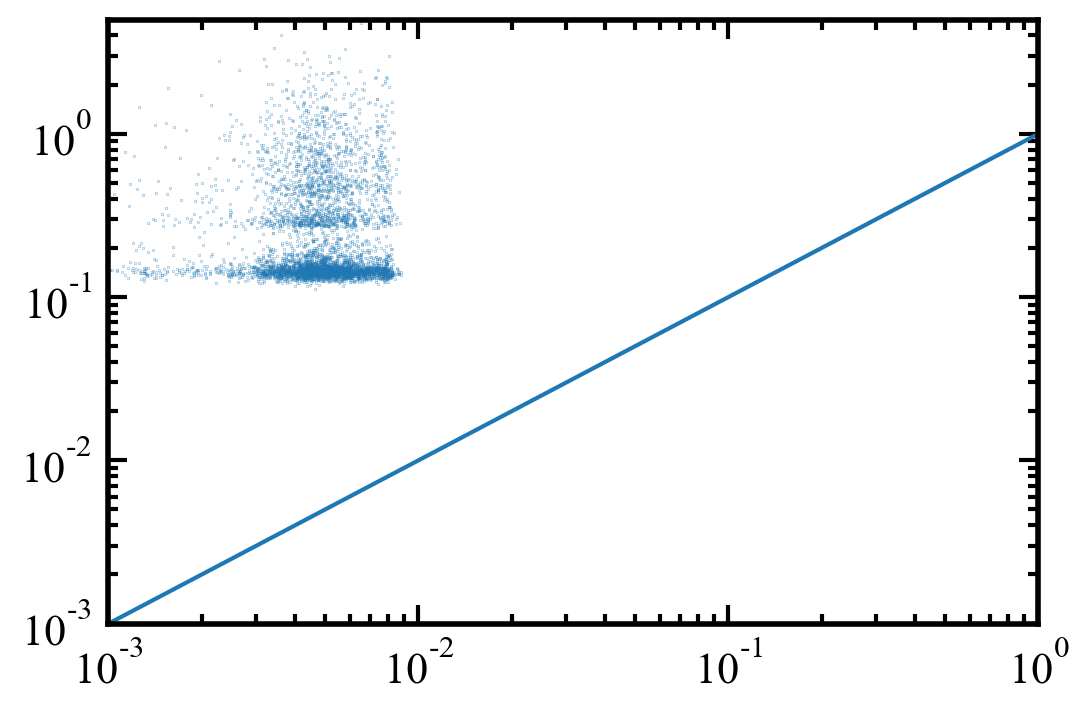

In [ ]:
#LR_error = np.divide(np.abs(np.subtract(y_test,mass_ratio_LR)),y_test)
#Lasso_error = np.divide(np.abs(np.subtract(y_test,mass_ratio_Lasso)),y_test)
#Ridge_error = np.divide(np.abs(np.subtract(y_test,mass_ratio_Ridge)),y_test)

#plt.hist(LR_error,bins=np.linspace(0.0,1.0,100),histtype='step',color='C0',normed=True)
#plt.hist(Lasso_error,bins=np.linspace(0.0,1.0,100),histtype='step',color='C1',normed=True)
#plt.hist(Ridge_error,bins=np.linspace(0.0,1.0,100),histtype='step',color='C2',normed=True)
#plt.show()

print np.min(y_test), np.max(y_test)
print np.mean(y_test)
print len(y_test[::100])

print np.min(mass_ratio_LR), np.max(mass_ratio_LR)
print np.mean(mass_ratio_LR)
hist_bins = np.linspace(-1.0,1.0,1000)

norm_val = False

plt.hist(mass_ratio_LR,bins=hist_bins,histtype='step',color='C0',normed=norm_val)
#plt.hist(mass_ratio_Lasso,bins=1000,histtype='step',color='C1',normed=norm_val)
#plt.hist(mass_ratio_Ridge,bins=hist_bins,histtype='step',color='C2',normed=norm_val)
plt.hist(y_test,bins=hist_bins,histtype='step',color='k',normed=norm_val)
#plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(mass_ratio_LR[::100],y_test[::100],s=0.01)
plt.plot([0.001,5.0],[0.001,5.0])
plt.xlim([0.001,1.0])
plt.ylim([0.001,5.0])
plt.xscale('log')
plt.yscale('log')
plt.show()


In [6]:
f_tf = np.loadtxt('./outputs_tf.txt')

tf_mass_true = f_tf[:,0]
tf_mass_predict = f_tf[:,1]

In [ ]:
print np.unique(tf_mass_predict)

print tf_mass_true

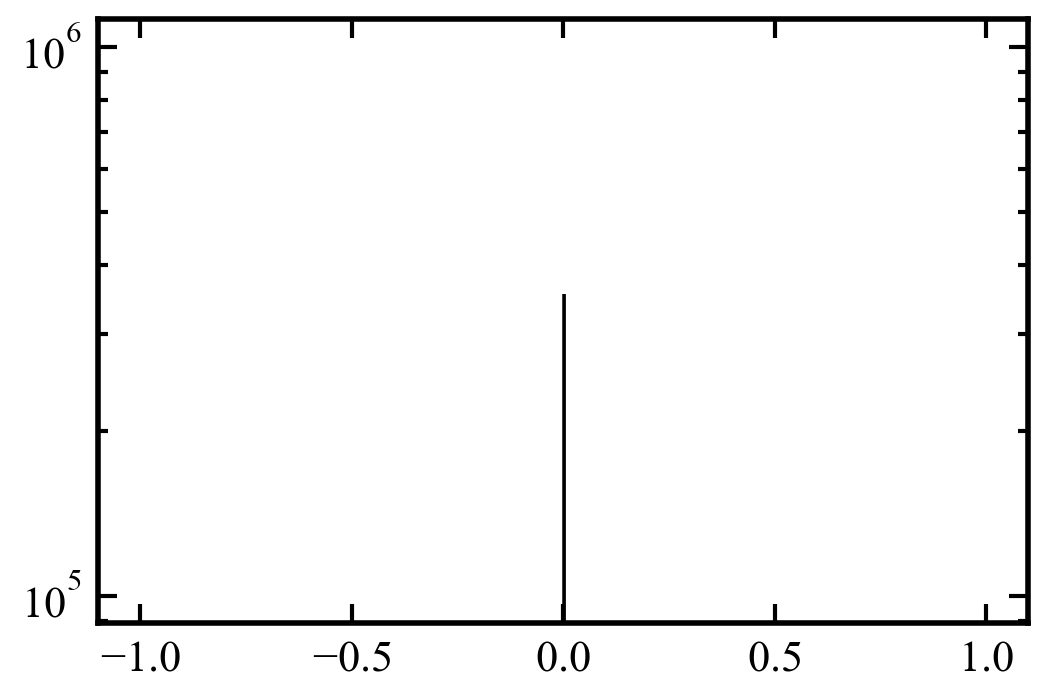

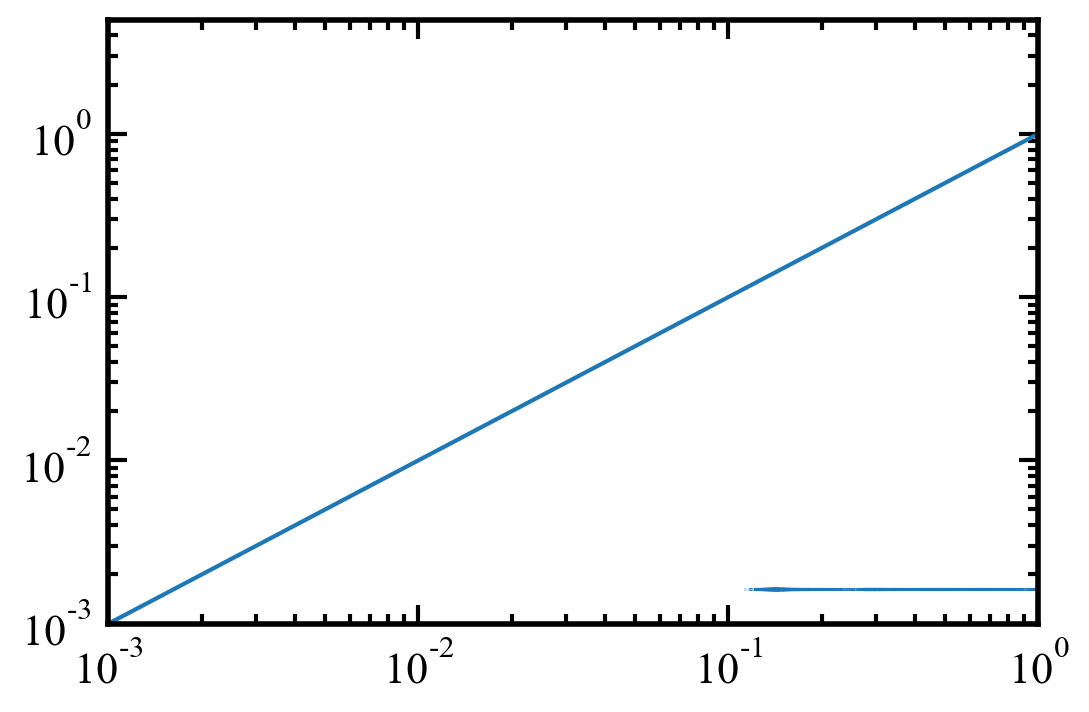

In [12]:
norm_val = False

hist_bins = np.linspace(-1.0,1.0,1000)

#plt.hist(tf_mass_true[::100],bins=hist_bins,histtype='step',color='C0',normed=norm_val)
#plt.hist(mass_ratio_Lasso,bins=1000,histtype='step',color='C1',normed=norm_val)
#plt.hist(mass_ratio_Ridge,bins=hist_bins,histtype='step',color='C2',normed=norm_val)
plt.hist(tf_mass_predict[::100],bins=hist_bins,histtype='step',color='k',normed=norm_val)
#plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(tf_mass_true[::100],tf_mass_predict[::100],s=0.01)
plt.plot([0.001,5.0],[0.001,5.0])
plt.xlim([0.001,1.0])
plt.ylim([0.001,5.0])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
#lets try a support vector machine
from sklearn.svm import NuSVR

SVR_func = NuSVR()
SVR_func.fit(X_train,y_train)
mass_ratio_SVR = SVR_func.predict(X_test)

/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
plt.hist(mass_ratio_SVR,bins=hist_bins,histtype='step',color='C0',normed=norm_val)
#plt.hist(mass_ratio_Lasso,bins=1000,histtype='step',color='C1',normed=norm_val)
#plt.hist(mass_ratio_Ridge,bins=hist_bins,histtype='step',color='C2',normed=norm_val)
plt.hist(y_test,bins=hist_bins,histtype='step',color='k',normed=norm_val)
#plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(mass_ratio_SVR[::100],y_test[::100],s=0.01)
plt.plot([0.001,5.0],[0.001,5.0])
plt.xlim([0.001,1.0])
plt.ylim([0.001,5.0])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor

SGD_func = SGDRegressor()
SGD_func.fit(X_train,y_train)
mass_ratio_SGD = SGD.predict(X_test)

In [ ]:
plt.hist(mass_ratio_SGD,bins=hist_bins,histtype='step',color='C0',normed=norm_val)
#plt.hist(mass_ratio_Lasso,bins=1000,histtype='step',color='C1',normed=norm_val)
#plt.hist(mass_ratio_Ridge,bins=hist_bins,histtype='step',color='C2',normed=norm_val)
plt.hist(y_test,bins=hist_bins,histtype='step',color='k',normed=norm_val)
#plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(mass_ratio_SGD[::100],y_test[::100],s=0.01)
plt.plot([0.001,5.0],[0.001,5.0])
plt.xlim([0.001,1.0])
plt.ylim([0.001,5.0])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [7]:
2+2

4

In [5]:
np.zeros((10,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [76]:
a = np.array([0.0,1.0,40.0,0.0,0.0,30.0])

bool_array = a!=0

int_array = np.array(bool_array,dtype=int)
int_array

array([0, 1, 1, 0, 0, 1])

In [ ]:
#Classifier tests

[[ 0.62702766  0.19859452 -0.12572131 -0.307635    1.10249085 -0.61402651]
 [-1.12266684  0.32320593  0.74759446 -0.63796197 -0.13231809  0.62562443]
 [ 1.94076161 -0.48356956 -0.8732314   1.22663498 -0.85603039 -1.00765656]
 ...
 [ 0.11306214 -0.34241095  0.31147123  0.82166442  1.69099662  0.63289401]
 [ 0.06925564  2.00910399  0.01271299 -0.94542011 -1.41938789 -0.35015628]
 [ 0.34522811 -0.71685128  1.07355602 -1.63160196 -1.18476079  0.94929309]]


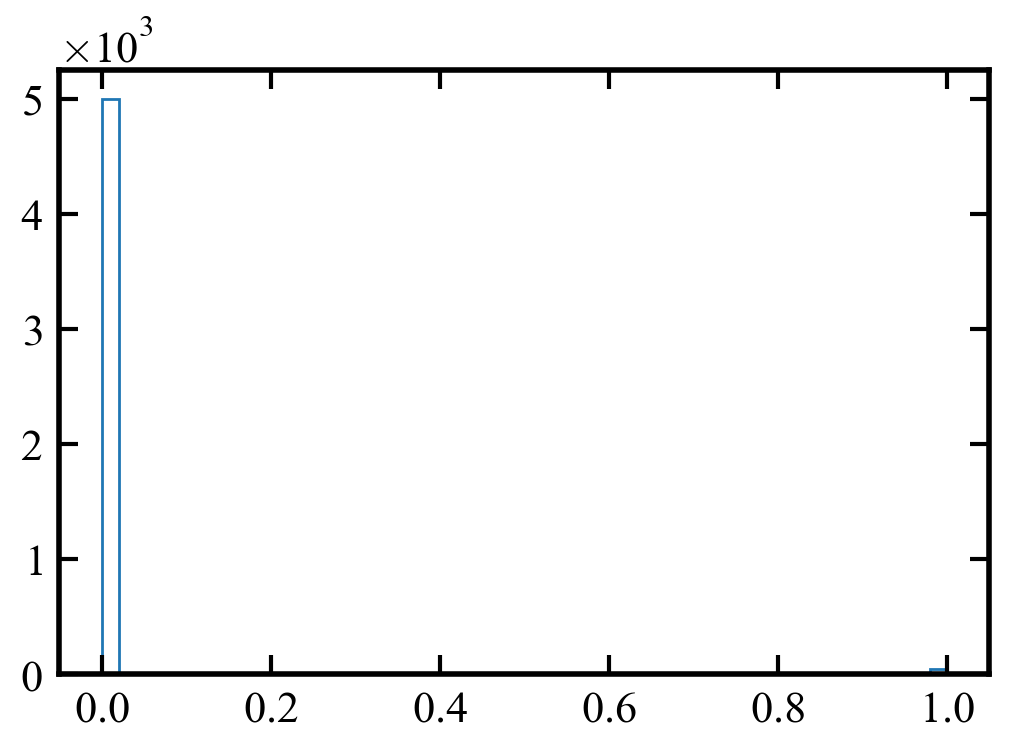

In [32]:
#okay lets generate fake phasespace data

#first I want lets say 1000 mass fractions half is all zeros
#

a = np.zeros(5000)
a_prime = np.ones_like(np.zeros(50))

n_data = 5050

x,y,z = np.random.normal(0.0,1.0,n_data), np.random.normal(0.0,1.0,n_data), np.random.normal(0.0,1.0,n_data)
v_x,v_y,v_z = np.random.normal(0.0,1.0,n_data), np.random.normal(0.0,1.0,n_data), np.random.normal(0.0,1.0,n_data)

mass_fraction_fake = np.append(a,a_prime)

#phase_space_coords = np.concatenate((x,y,z,v_x,v_y,v_z),axis=1)
phase_space_coords = np.hstack((x[np.newaxis].T,y[np.newaxis].T,z[np.newaxis].T
                                ,v_x[np.newaxis].T,v_y[np.newaxis].T,v_z[np.newaxis].T))

print phase_space_coords

plt.hist(mass_fraction_fake,50,histtype='step')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(phase_space_coords,mass_fraction_fake,
                                                    test_size=0.5,random_state=102)



In [33]:
def build_model():
    model = keras.Sequential([layers.Dense(64, activation='relu', 
                            input_shape=[6]),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1)
                             ])
    
    optimizer = 'adam'

    #Can use BinaryCrossentropy because I have only two labels                                                        
    loss  = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    
    model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
    
    return model

print 'I guess we build this thing'

model = build_model()

I guess we build this thing


In [34]:
EPOCHS = 10
history = model.fit(X_train, y_train, epochs=EPOCHS, verbose=2)



Train on 2525 samples
Epoch 1/10
2525/2525 - 0s - loss: 0.2332 - accuracy: 0.9897
Epoch 2/10
2525/2525 - 0s - loss: 0.0545 - accuracy: 0.9921
Epoch 3/10
2525/2525 - 0s - loss: 0.0524 - accuracy: 0.9921
Epoch 4/10
2525/2525 - 0s - loss: 0.0515 - accuracy: 0.9921
Epoch 5/10
2525/2525 - 0s - loss: 0.0504 - accuracy: 0.9921
Epoch 6/10
2525/2525 - 0s - loss: 0.0497 - accuracy: 0.9921
Epoch 7/10
2525/2525 - 0s - loss: 0.0490 - accuracy: 0.9921
Epoch 8/10
2525/2525 - 0s - loss: 0.0491 - accuracy: 0.9921
Epoch 9/10
2525/2525 - 0s - loss: 0.0481 - accuracy: 0.9921
Epoch 10/10
2525/2525 - 0s - loss: 0.0475 - accuracy: 0.9921


In [35]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [36]:
predictions = model.predict(X_train)


In [37]:
for ii in range(len(predictions)):
    print(predictions[ii],y_train[ii])

(array([-3.360423], dtype=float32), 0.0)
(array([-3.237644], dtype=float32), 0.0)
(array([-2.687861], dtype=float32), 0.0)
(array([-4.2977424], dtype=float32), 0.0)
(array([-6.8031087], dtype=float32), 0.0)
(array([-3.609666], dtype=float32), 0.0)
(array([-5.8125253], dtype=float32), 0.0)
(array([-8.717098], dtype=float32), 0.0)
(array([-3.1770353], dtype=float32), 0.0)
(array([-4.564891], dtype=float32), 0.0)
(array([-4.3957343], dtype=float32), 0.0)
(array([-5.8408484], dtype=float32), 0.0)
(array([-4.5392528], dtype=float32), 0.0)
(array([-3.7834435], dtype=float32), 0.0)
(array([-4.6057167], dtype=float32), 0.0)
(array([-4.7121797], dtype=float32), 0.0)
(array([-5.148336], dtype=float32), 0.0)
(array([-3.7957478], dtype=float32), 0.0)
(array([-6.5833735], dtype=float32), 0.0)
(array([-4.806543], dtype=float32), 0.0)
(array([-7.621337], dtype=float32), 0.0)
(array([-3.7067945], dtype=float32), 0.0)
(array([-3.8149488], dtype=float32), 0.0)
(array([-8.947686], dtype=float32), 0.0)
(a

In [38]:
def build_model():
    model = keras.Sequential([layers.Flatten(input_shape=(6,)),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1, activation='sigmoid')
                             ])
    
    optimizer = 'adam'

    #Can use BinaryCrossentropy because I have only two labels                                                        
    loss  = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    
    model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
    
    return model

print 'I guess we build this thing'

model = build_model()

I guess we build this thing


In [42]:
EPOCHS = 10000
history = model.fit(X_train, y_train, epochs=EPOCHS, verbose=0)

In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

2525/2525 [==============================] - 0s 27us/sample - loss: 0.6931 - accuracy: 0.9881
('Test accuracy:', 0.9881188)


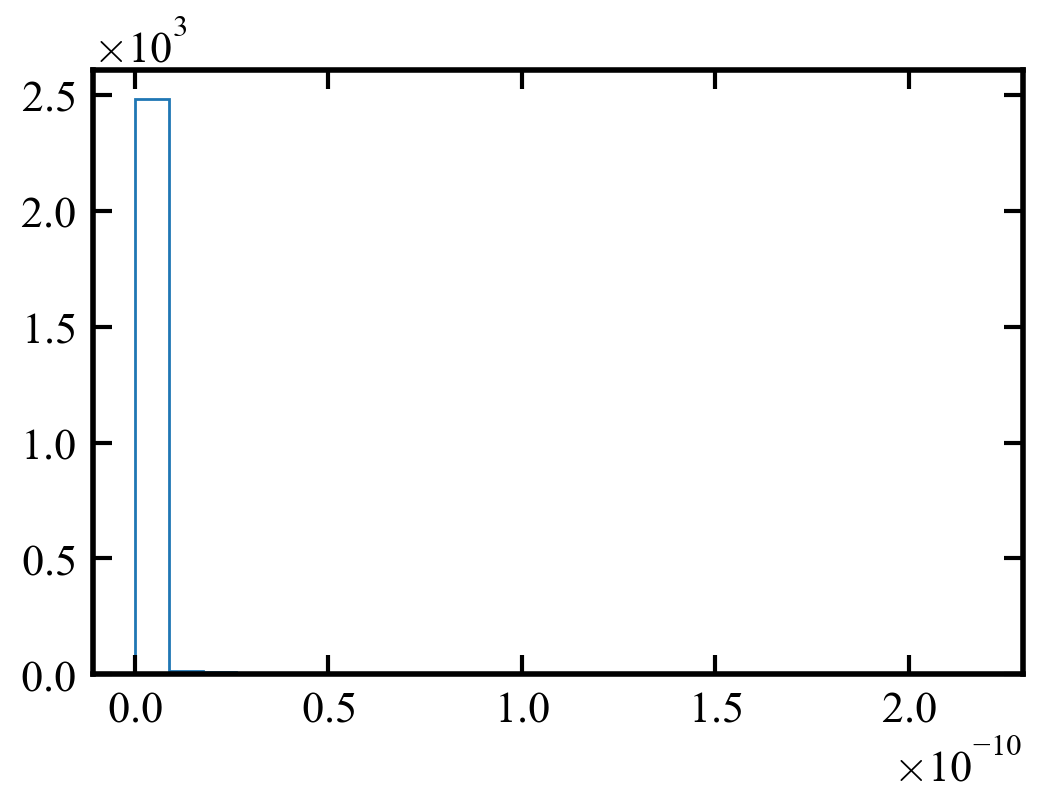

In [44]:
predictions

plt.hist(predictions,bins=25,histtype='step')
plt.show()

In [13]:
f_halo = h5py.File('../m12i_res_7100_cdm/halo_600.hdf5')

pos_halo = f_halo['position'][:]
mass_halo = f_halo['mass'][:]
radius_halo = f_halo['radius'][:]
vel_halo = f_halo['velocity'][:]

#identify the host                                                                                                   \
                                                                                                                      
host_id = np.argmax(mass_halo)
host_mass = mass_halo[host_id]
host_pos = pos_halo[host_id]
host_vel = vel_halo[host_id]

f = h5py.File('DM_data_w_stars_training.hdf5')

coords = f['PartType1']['Coordinates'][:]
vel = f['PartType1']['Velocities'][:]
mass_ratio = f['PartType1']['Mass_Ratio'][:]

diff_coord = coords-host_pos
diff_vel = vel - host_vel

dist  = np.linalg.norm(diff_coord)
gal_select = (dist<300.0)

diff_coord_gal = diff_cord[gal_select]
diff_vel_gal = diff_vel[gal_select]

#1) attempt to save memory by reducing number of points                                                               
#   remove everything outside 400 kpc (these shouldn't)                                                               
#   factor in anyways                                                                                                 

#I think I need to merge coords and vel into a                                                                        
#2X6 array                                                                                                            

#Now this matrix is so large we run into memory errors                                                                
#                                                                                                                     
#A few potential solutions:                                                                                           
# 1) reduce the number of input points (limit to dm part within 400 kpc?) [NOPE]                                      
# 2) change algorithm (some might require less memory or some option)                                                 
#    may reduce memory                                                                                                
#    - Try using GaussianProccessRegressor module [X]                                                                 
#    - Try "bagging"                                                                                                  
# 3) run on a processor with more memory or figure out how to parallelize                                             

phase_space_coords =  np.concatenate((coords-host_pos,vel-host_vel),axis=1)

X_train, X_test, y_train, y_test = train_test_split(phase_space_coords,mass_ratio,
                                                    test_size=0.9999,random_state=102)




In [29]:
diff_coord = coords-host_pos
diff_vel = vel - host_vel

dist  = np.linalg.norm(diff_coord,axis=1)
gal_select = (dist<100.0)

diff_coord_gal = diff_coord[gal_select]
diff_vel_gal = diff_vel[gal_select]
mass_ratio_gal = mass_ratio[gal_select]

phase_space_coords =  np.concatenate((diff_coord_gal,diff_vel_gal),axis=1)

print len(dist)
print len(mass_ratio_gal)

print (np.sum(mass_ratio_gal>0.0))



70514272
15489004
342360


In [ ]:
28999853/538546

X_train, X_test, y_train, y_test = train_test_split(phase_space_coords,mass_ratio,
                                                    test_size=0.9999,random_state=102)

In [14]:
y_train_classifier  = np.array((y_train!=0),dtype=int)

print len(y_train_classifier)

7051


In [18]:
def build_model():
    model = keras.Sequential([layers.Flatten(input_shape=(6,)),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1, activation='sigmoid')
                             ])
    
    optimizer = 'adam'

    #Can use BinaryCrossentropy because I have only two labels                                                        
    loss  = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    
    model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
    
    return model

print 'I guess we build this thing'

model = build_model()

I guess we build this thing


In [45]:
EPOCHS = 10
BATCH_SIZE = 2048
history = model.fit(X_train, y_train_classifier, epochs=EPOCHS, verbose=2)

ValueError: Input arrays should have the same number of samples as target arrays. Found 2525 input samples and 7051 target samples.

In [23]:
print np.unique(y_train_classifier)
print np.sum(y_train_classifier>0.0)

frac =  float(np.sum(y_train_classifier>0.0))/float(len(y_train_classifier))

1.0 - frac

[0 1]
94


0.9866685576513969

35257136/35257136 - 807s - loss: 0.6931 - accuracy: 0.9892


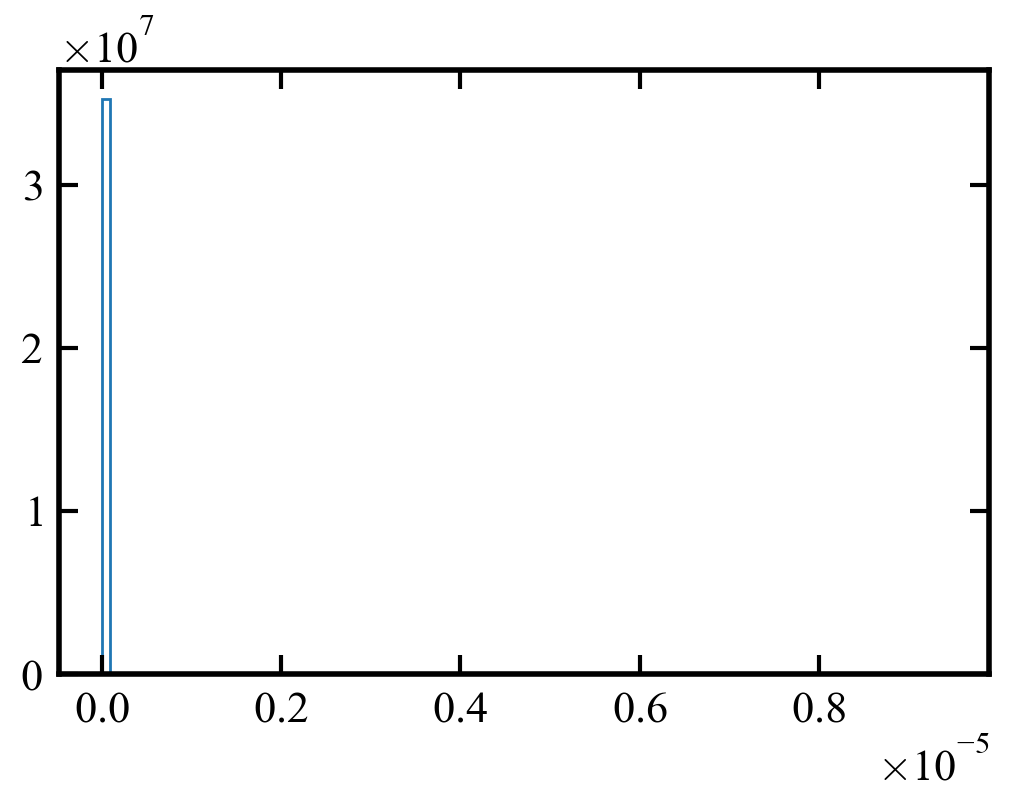

In [7]:
y_test_classifier  = np.array((y_test!=0),dtype=int)

model = tf.keras.models.load_model('saved_models/Classifier_test_sigmoid.h5')

test_loss, test_acc = model.evaluate(X_test,y_test,verbose=2)

model_output = model.predict(X_test)

plt.hist(model_output,bins=100,histtype='step')
plt.show()

[0 0 0 ... 0 0 0]
[0 1]


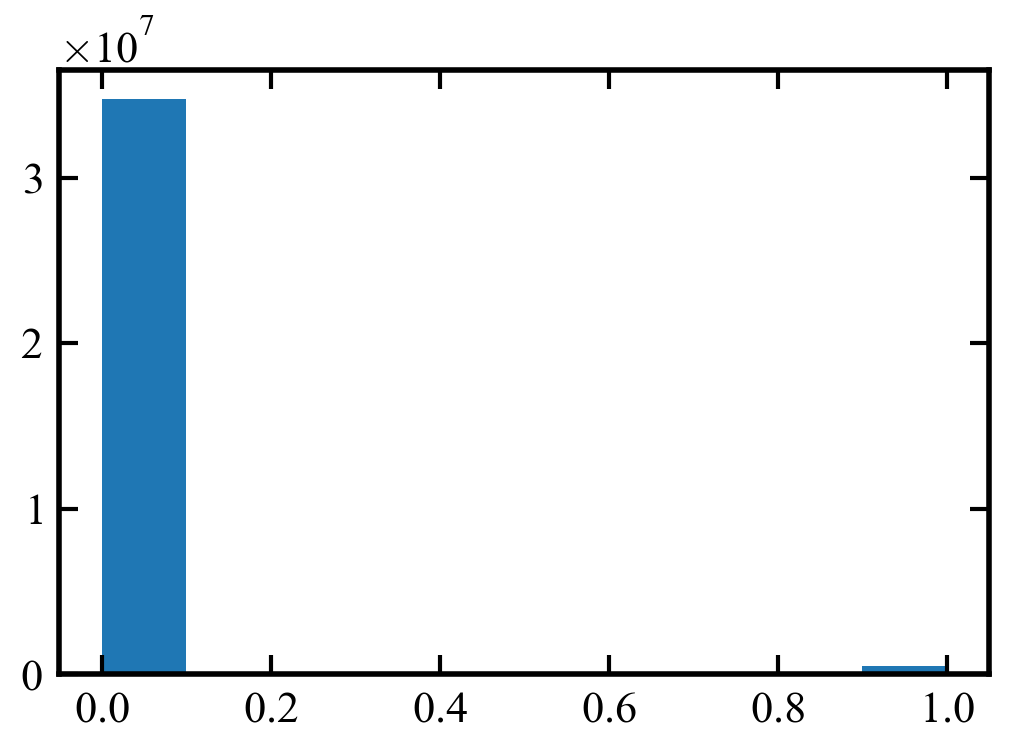

In [10]:
print y_test_classifier

print np.unique(y_test_classifier)

plt.hist(y_test_classifier)
plt.show()